# I.Topic presentation:


Titanic Dataset is a famous dataset that contains passengers' information from the Titanic ship accident. Our goal in this project is to test out and interpret on different levels multiple models and ML techniques. Therefore we chose this dataset with a defined amount of data in order to demonstrate how different models process a simple classification problem, which in our case is the prediction of the survival of the passengers through age and passengers' class among other features.

The first part of the following report is dedicated to preprocessing and analyzing the data. This will include data presentation, cleaning, handling missing values and exploration. <br>
The second part will be focused on model selection & interpretation. We will evaluate different models based on multiple metrics and justify the reasoning behind the chosen models and the champion model.

This analysis has been made by lozb9 and a fellow colleague. 

In [1]:
#IMPORTS
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import re
warnings.filterwarnings("ignore")

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_curve, roc_auc_score, RocCurveDisplay
from sklearn.ensemble import BaggingClassifier # for bootstraping
from sklearn.model_selection import train_test_split
#from sklearn.metrics import precision_recall_fscore_support
from sklearn.tree import plot_tree #viz DT
from sklearn.model_selection import GridSearchCV, cross_val_score #hyper param

from sklearn.ensemble import RandomForestClassifier # RF

# II.Data:

## 1 - Data presentation:

** Our main objective here is to get to know our data: understand what is behind each variable, determine what is our dependant variable, if it necessites any cleaning, any nan treatment... We also want to understand whether each variable is discrete, continuous, textual type.

**Variable:** 

*survival*:	Survival	0 = No, 1 = Yes -> Dependant variable

*pclass*:	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
*sex*:	Sex	
*Age*:	Age in years	
*sibsp*:	# of siblings / spouses aboard the Titanic	
*parch*:	# of parents / children aboard the Titanic	
*ticket*:	Ticket number	
*fare*:	Passenger fare	
*cabin*:	Cabin number	
*embarked*:	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

**Variable notes:**

*pclass*: A proxy for socio-economic status (SES) <br>
1st = Upper <br>
2nd = Middle<br>
3rd = Lower<br>

*age*: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

*sibsp*: The dataset defines family relations in this way: Sibling = brother, sister, stepbrother, stepsister. Spouse = husband, wife (mistresses and fiancés were ignored)

*parch*: The dataset defines family relations in this way: Parent = mother, father. Child = daughter, son, stepdaughter, stepson.

In [2]:
# upload dataset
df_all = pd.read_excel('titanic3.xls')
# data information
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    1309 non-null   int64  
 1   Survived  1309 non-null   int64  
 2   Name      1309 non-null   object 
 3   Sex       1309 non-null   object 
 4   Age       1046 non-null   float64
 5   SibSp     1309 non-null   int64  
 6   Parch     1309 non-null   int64  
 7   Ticket    1309 non-null   object 
 8   Fare      1308 non-null   float64
 9   Cabin     295 non-null    object 
 10  Embarked  1307 non-null   object 
dtypes: float64(2), int64(4), object(5)
memory usage: 112.6+ KB


In [3]:
df_all.head()

,Pclass,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S


In [4]:
df_all.tail()

,Pclass,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1304,3,0,"Zabour, Miss. Hileni",female,14.5,1,0,2665,14.4542,NaN,C
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5,0,0,2656,7.2250,NaN,C
1307,3,0,"Zakarian, Mr. Ortin",male,27.0,0,0,2670,7.2250,NaN,C
1308,3,0,"Zimmerman, Mr. Leo",male,29.0,0,0,315082,7.8750,NaN,S


In [5]:
df_all.describe().T

,count,mean,std,min,25%,50%,75%,max
Pclass,1309.0,2.294882,0.837836,1.0000,2.0000,3.0000,3.000,3.0000
Survived,1309.0,0.381971,0.486055,0.0000,0.0000,0.0000,1.000,1.0000
Age,1046.0,29.881135,14.413500,0.1667,21.0000,28.0000,39.000,80.0000
SibSp,1309.0,0.498854,1.041658,0.0000,0.0000,0.0000,1.000,8.0000
Parch,1309.0,0.385027,0.865560,0.0000,0.0000,0.0000,0.000,9.0000
Fare,1308.0,33.295479,51.758668,0.0000,7.8958,14.4542,31.275,512.3292


In [6]:
# Display missing values in sum and %
print('Sum of missing values:')
print(df_all.isna().sum())
print('\n % of missing values:')
print(100 * df_all.isnull().sum() / len(df_all))

Sum of missing values:
Pclass         0
Survived       0
Name           0
Sex            0
Age          263
SibSp          0
Parch          0
Ticket         0
Fare           1
Cabin       1014
Embarked       2
dtype: int64

 % of missing values:
Pclass       0.000000
Survived     0.000000
Name         0.000000
Sex          0.000000
Age         20.091673
SibSp        0.000000
Parch        0.000000
Ticket       0.000000
Fare         0.076394
Cabin       77.463713
Embarked     0.152788
dtype: float64


## 2 - Data cleaning & Feature engineering:

From the code just above, we can clearly see that: <br>
==> 77% of *Cabin* values are missing (1014 rows) <br>
==> 20% of *Age* values are missing (263 rows) <br>
==> 0.15% of *Embarked* valuesare missing (2 rows) <br>
==> 0.07% of Fare is missing (1 row) <br>

We will proceed to handling the missing values <br>

_______________________________________________________

Afterwards we will apply feature engineering on some specific features such as:<br>
Age <---------------------> Age_group <br>
Cabin <-------------------> Cabin_letter <br>
*SibSp & Parch* <------> Relatives 

**By applying Feature Engineering to exisitng features we aim to create features that will increase the predictive power of our models.**

In [7]:
# Handling missing data for Age
'''
We will fill in the missing data based on the mean value of the Title of each passenger by extracting it from the Name column
Those with similar title such as Mlle, Miss will be joined in the same category
'''

'\nWe will fill in the missing data based on the mean value of the Title of each passenger by extracting it from the Name column\nThose with similar title such as Mlle, Miss will be joined in the same category\n'

In [8]:
# function will extract the Title from the Name
def get_title(name):
    names = name.split(', ')
    title = names[1].split('.')
    return title[0]

# apply function to new column 'Title'
df_all['Title'] = df_all['Name'].apply(get_title) 
df_all['Title'].value_counts()

#Joining similar titles together
mr_titles = ['Capt', 'Col', 'Don', 'Dr', 'Jonkheer', 'Major', 'Mr', 'Rev', 'Sir']
mrs_titles = ['Lady', 'the Countess','Mme', 'Mrs', 'Dona']
miss_titles = ['Miss', 'Mlle', 'Ms']

#Replace by the group of Titles
df_all['Title'] = df_all['Title'].replace(mr_titles, 'Mr')
df_all['Title'] = df_all['Title'].replace(mrs_titles, 'Mrs')
df_all['Title'] = df_all['Title'].replace(miss_titles, 'Miss')

# find mean for each distinct title group
age = df_all.groupby("Title").agg({'Age': 'mean'})
age.rename(columns={'Age': 'MeanAge'}, inplace = True)
# merge both age and df_all on Title
df_all = df_all.merge(age, on='Title', how='left')

#fill missing values
df_all['Age'] = df_all['Age'].fillna(df_all['MeanAge'])

#drop MeanAge
df_all = df_all.drop('MeanAge', axis=1)

# Create bins with age groups
df_all["Age_group"] = pd.cut(df_all['Age'], bins=range(0, 100, 10), right=False)
print(df_all["Age_group"].value_counts())

[30, 40)    436
[20, 30)    395
[10, 20)    143
[40, 50)    135
[0, 10)      90
[50, 60)     70
[60, 70)     32
[70, 80)      7
[80, 90)      1
Name: Age_group, dtype: int64


In [9]:
# Handling missing values in Cabin
'''
We create new feature *Cabin_letter' which will contain the first letter of each cabin (deck on which passenger is staying)
 or unknown categoryif no first letter exists
'''
df_all['Cabin_letter'] = np.NaN
df_all['Cabin_letter'] = [c[0] if pd.notna(c) else np.NaN for c in df_all['Cabin']]
df_all['Cabin_letter'].value_counts(dropna=False)

#add unknown category
df_all['Cabin_letter'] = np.where(pd.isna(df_all['Cabin_letter']), 'Unknown', df_all['Cabin_letter'])
df_all['Cabin_letter'].value_counts(dropna=False)

Unknown    1014
C            94
B            65
D            46
E            41
A            22
F            21
G             5
T             1
Name: Cabin_letter, dtype: int64

In [10]:
# Handling missing values in EMBARKED  ==> 2 missing values we replaced arbitrarily by S which is the most common category

df_all.Embarked.value_counts() #S
df_all.Embarked.fillna('S', inplace=True)
df_all['Embarked'].value_counts()

S    916
C    270
Q    123
Name: Embarked, dtype: int64

In [11]:
# Handling missing value in FARE ==> missing values are arbitrarily replaced by their corresponding fare mean per title. 

#avg fare per title
average_fare = df_all.groupby('Title')['Fare'].mean()

#fill missing fare values by the avg fare per title
df_all['Fare'] = df_all.groupby('Title')['Fare'].transform(lambda x: x.fillna(x.mean()))
print(df_all['Fare'].value_counts())

8.0500     60
13.0000    59
7.7500     55
26.0000    50
7.8958     49
           ..
15.0500     1
14.0000     1
15.5792     1
12.0000     1
7.8750      1
Name: Fare, Length: 282, dtype: int64


In [12]:
'''
Both Features *SibSp* & *Parch* describe the number of either sibling/spouse or parent/children
we create a new feature *Relatives* based on both features that will count the number of relatives for each passenger
This feature will contain the number of relatives if it's 3 or below
Above 3 it will contain value +3
'''

df_all['Relatives'] = df_all['SibSp'] + df_all['Parch']
df_all['Relatives'].replace([4,5,6,7,8,9,10], '+3', inplace=True)
print(df_all['Relatives'].value_counts())


df_all.groupby('Relatives')['Survived'].mean().to_frame()

0     790
1     235
2     159
+3     82
3      43
Name: Relatives, dtype: int64


,Survived
Relatives,
0,0.302532
1,0.536170
2,0.566038
3,0.697674
+3,0.182927


In [13]:
'''
The feature "Ticket" represents the ticket reservation number.  
We chose to isolate the "root value" of each ticket reservation (everything behind the first space) as we found repetition of the roots for some tickets. 
Interestingly, the selected roots (we selected all roots who have +13 occurences) have particular survivals ditribution, with often a high survival rate. 
This feature will contain the ticket root if it has +13 occurences.
Otherwise, it will be considered as "Unknown category". 
'''

df_all.Ticket
df_all[['Ticket_A', 'Ticket_B', 'Ticket_C']]= df_all['Ticket'].str.split(' ', expand=True)
liste_ticket_root_to_categorize = list(df_all['Ticket_A'].value_counts()[df_all['Ticket_A'].value_counts()> 13].keys())
df_all['Ticket_2'] = ['ticket_root '+str(a) if a in liste_ticket_root_to_categorize else 'unknown_categ' for a in df_all['Ticket_A']]
print(df_all['Ticket_2'].value_counts())

unknown_categ             1127
ticket_root PC              92
ticket_root C.A.            46
ticket_root SOTON/O.Q.      16
ticket_root W./C.           14
ticket_root STON/O          14
Name: Ticket_2, dtype: int64


## 3 - Exploratory Data Analysis :

Survivals by gender

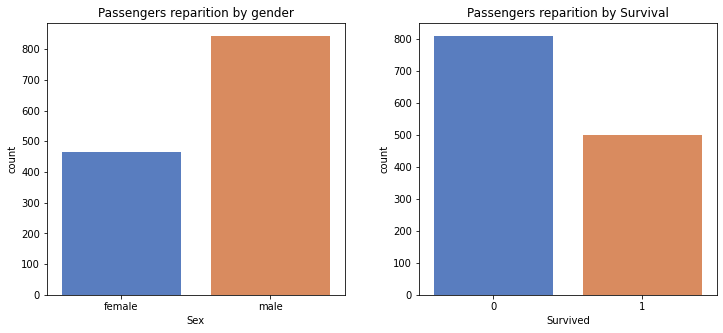

% of passengers by gender: 
 male      64.400306
female    35.599694
Name: Sex, dtype: float64

% of passengers by survival: 
 0    61.802903
1    38.197097
Name: Survived, dtype: float64


In [14]:
# figure with 2 subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

#repartition by gender
sns.countplot(x='Sex', data=df_all, ax=axs[0], palette="muted").set(title='Passengers reparition by gender')
# reparititon by survival
sns.countplot(x='Survived', data=df_all, ax=axs[1], palette="muted").set(title='Passengers reparition by Survival')
# Adjust the spacing 
plt.subplots_adjust(wspace=0.25)
# Show the plot
plt.show()

'''
we can see from the first chart that male passenger exceed female passengers in the ship 64.5% compared to 35.5
from the second plot we can see that deaths (0) far exceed the survivals in the ship [only 38% survived]
'''
# % gender repartition among passengers
print('% of passengers by gender: \n',df_all['Sex'].value_counts() / df_all['Sex'].value_counts().sum() *100)
# % of survivals among passengers
print('\n% of passengers by survival: \n',df_all['Survived'].value_counts() / df_all['Survived'].value_counts().sum() *100)

# of survivals by gender:
 Sex     Survived
female  0           127
        1           339
male    0           682
        1           161
Name: Survived, dtype: int64 
 
 % of Survivals by gender:
 Survived      0      1
Sex                   
female    27.25  72.75
male      80.90  19.10
All       61.80  38.20


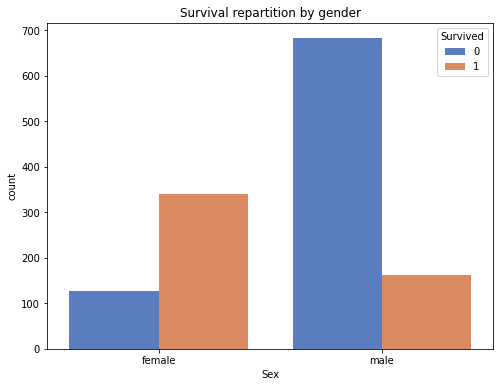

In [15]:
# survivals by gender 
fig, ax = plt.subplots(figsize=(8, 6))
sns.countplot(x='Sex', hue='Survived', data=df_all, palette="muted").set(title='Survival repartition by gender')
'''
we can clearly see from the figure below that ==> more male died (80%) compared to 27% of female deaths eventhough the ship had more male passengers than female ones
one possible explanation is that male passengers were not prioritized for taking a lifeboats and had to wait until women and children were evacuated
'''
sum_group = df_all.groupby(['Sex', 'Survived'])['Survived'].count()
percent_group = pd.crosstab(df_all['Sex'], df_all['Survived'], margins=True,normalize='index')*100
percent_group = percent_group.round(2)

print('# of survivals by gender:\n',sum_group, '\n \n % of Survivals by gender:\n', percent_group)

*Survivals per class*

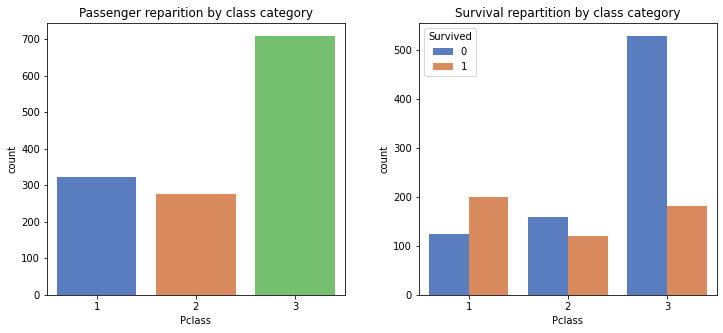

# of passengers by Pclass: 
 3    709
1    323
2    277
Name: Pclass, dtype: int64

 % of survivals by class category: 
 Survived      0      1
Pclass                
1         38.08  61.92
2         57.04  42.96
3         74.47  25.53
All       61.80  38.20


In [16]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
# repartition of passenger per class category
sns.countplot(x='Pclass', data=df_all, ax=axs[0], palette="muted").set(title='Passenger reparition by class category')
#Survival by ticket class category
sns.countplot(x = 'Pclass', hue = 'Survived', data = df_all, ax=axs[1], palette="muted").set(title='Survival repartition by class category')
# Adjust the spacing 
plt.subplots_adjust(wspace=0.25)
# Show the plot
plt.show()

'''
We can see that category 3 had far more passengers (709) compared to the upper 1st class who had 277 passengers
However 1st class is the only class whose survivals exceeded its deaths.. The gap is far more apparent in the 3rd class (74.5% deaths)
This could be possibly explained by the fact that the 1st class passengers had higher cabins in the ship meaning that they had more time and easier access to lifeboats
There could be a possible correlation but it doesn't necessarily mean causality !!
'''
print('# of passengers by Pclass: \n',df_all['Pclass'].value_counts())
percent_group = pd.crosstab(df_all['Pclass'], df_all['Survived'], margins=True,normalize='index')*100
percent_group = percent_group.round(2)

print('\n % of survivals by class category: \n', percent_group)

*Survivals by Age groups*

# of passengers by Age group: 
 [30, 40)    436
[20, 30)    395
[10, 20)    143
[40, 50)    135
[0, 10)      90
[50, 60)     70
[60, 70)     32
[70, 80)      7
[80, 90)      1
Name: Age_group, dtype: int64

 % of survivals by Age group: 
 Survived       0       1
Age_group               
[0, 10)    41.11   58.89
[10, 20)   60.84   39.16
[20, 30)   60.25   39.75
[30, 40)   68.35   31.65
[40, 50)   61.48   38.52
[50, 60)   54.29   45.71
[60, 70)   68.75   31.25
[70, 80)   85.71   14.29
[80, 90)    0.00  100.00
All        61.80   38.20


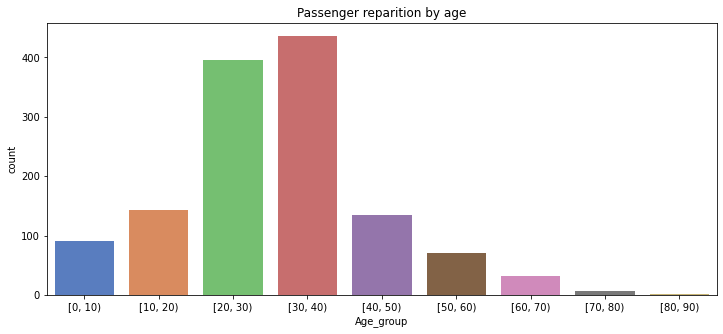

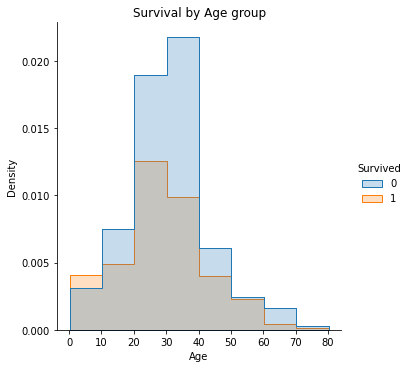

In [17]:
fig, ax = plt.subplots(figsize=(12, 5))
# repartition of passenger by age
sns.countplot(x='Age_group', data=df_all, palette="muted").set(title='Passenger reparition by age')

#survival by age group
sns.displot(data=df_all, x='Age', hue='Survived', stat='density', element='step',binwidth=10).set(title='Survival by Age group')

'''
1st plot show that groups [20, 30) & [30, 40] were among the most passengers in the ship
The second figure shows that these same groups had the highest levels of deaths
It also shows that except [0, 10) children all other age categories suffered more deaths ==> one possible explanation is that children were prioritized for taking a lifeboat
'''
print('# of passengers by Age group: \n',df_all['Age_group'].value_counts())
percent_group = pd.crosstab(df_all['Age_group'], df_all['Survived'], margins=True,normalize='index')*100
percent_group = percent_group.round(2)

print('\n % of survivals by Age group: \n',percent_group)

 *Survivals by relatives*

# of relatives: 
 0     790
1     235
2     159
+3     82
3      43
Name: Relatives, dtype: int64

% of survivals by relatives: 
 Survived       0      1
Relatives              
0          69.75  30.25
1          46.38  53.62
2          43.40  56.60
3          30.23  69.77
+3         81.71  18.29
All        61.80  38.20


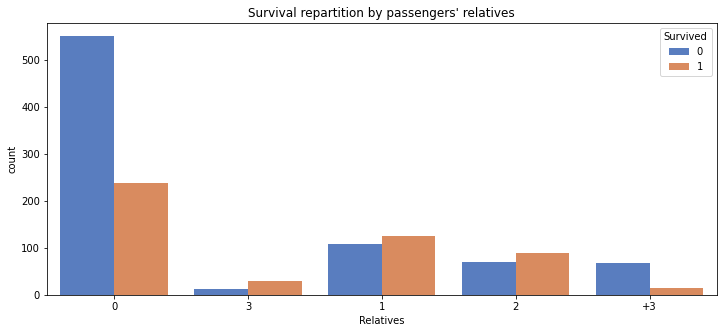

In [18]:
# Survival by relatives on board
fig, ax = plt.subplots(figsize=(12, 5))
sns.countplot(x = 'Relatives', hue = 'Survived', data = df_all, palette="muted").set(title="Survival repartition by passengers' relatives")

'''
We can see that passengers on the ship who had no relatives aboard represent the biggest population of passengers
This same category suffered from almost 70% deaths :
one possible explanation is that this category of passengers has a high numbers of poorer people who had less access 
to lifeboats and/or men who were not prioritized for the lifeboats


The only two passengers types who had more deaths than survivals are those who had no passengers (which is the majority in the ship)
and those who had over 3 relatives aboard ==> *One possible explanation* is that having more family meant more 
time searching for them and/or deciding to stay all together
and not abandon one another by consequence having more trouble finding a lifeboat to fit all members. 

THE INTERPRETATION HIGHLIGHT A POSSIBLE CORRELATION BUT NOT NECESSARILY A CAUSATION !
'''

print('# of relatives: \n',df_all['Relatives'].value_counts())
percent_group = pd.crosstab(df_all['Relatives'], df_all['Survived'], margins=True,normalize='index')*100
percent_group = percent_group.round(2)

print('\n% of survivals by relatives: \n',percent_group)

*Survivals by Embarked*

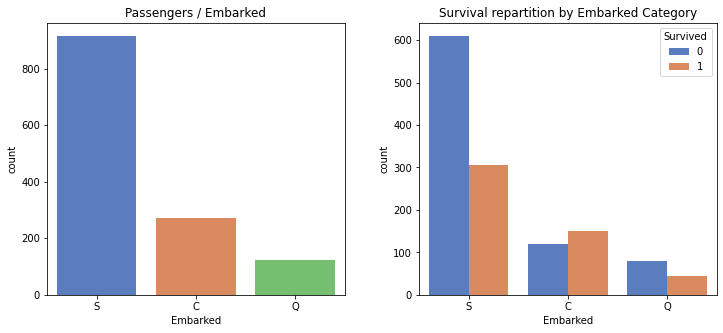

# of passengers per harbour: 
 S    916
C    270
Q    123
Name: Embarked, dtype: int64

% of survivals per harbour: 
 Survived      0      1
Embarked              
C         44.44  55.56
Q         64.23  35.77
S         66.59  33.41
All       61.80  38.20


'\nIt is pretty clear that from Southampton port far more passengers boarded the Titanic\nThe second plot shows a POSSIBLE correlation between survivals and Cherbourg port and between deaths and other two ports ==> but this correlation DOES NOT MEAN CAUSATION !!\n'

In [19]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
# passengers per Embarked gate
sns.countplot(x='Embarked', data=df_all, ax=axs[0], palette="muted").set(title='Passengers / Embarked')
#Survival by embarked category
sns.countplot(x = 'Embarked', hue = 'Survived', data = df_all, ax=axs[1], palette="muted").set(title='Survival repartition by Embarked Category')
# Adjust the spacing 
plt.subplots_adjust(wspace=0.25)
# Show the plot
plt.show()

print('# of passengers per harbour: \n',df_all['Embarked'].value_counts())
percent_group = pd.crosstab(df_all['Embarked'], df_all['Survived'], margins=True,normalize='index')*100
percent_group = percent_group.round(2)

print('\n% of survivals per harbour: \n',percent_group)

'''
It is pretty clear that from Southampton port far more passengers boarded the Titanic
The second plot shows a POSSIBLE correlation between survivals and Cherbourg port and between deaths and other two ports ==> but this correlation DOES NOT MEAN CAUSATION !!
'''


Survivals per ticket root

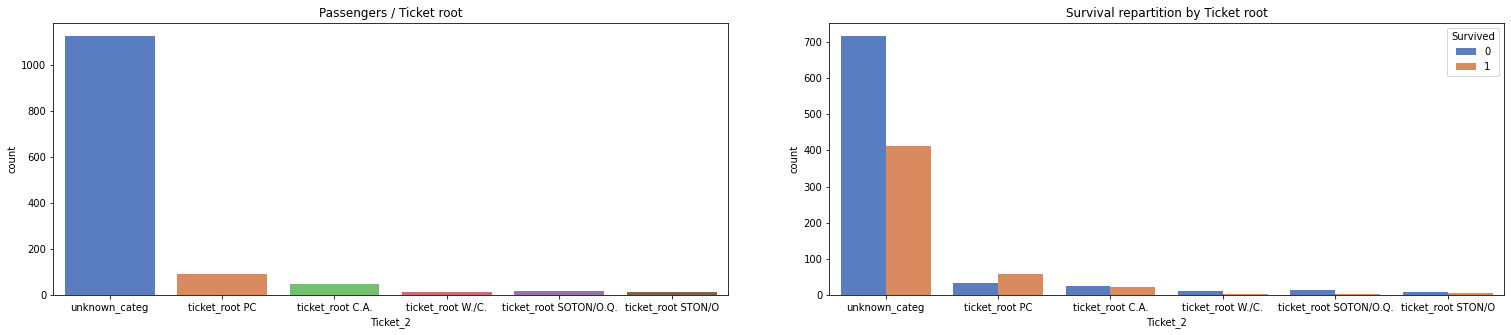

# of passengers by Ticket root: 
 unknown_categ             1127
ticket_root PC              92
ticket_root C.A.            46
ticket_root SOTON/O.Q.      16
ticket_root W./C.           14
ticket_root STON/O          14
Name: Ticket_2, dtype: int64

 % of survivals by ticket root: 
 Survived                    0      1
Ticket_2                            
ticket_root C.A.        54.35  45.65
ticket_root PC          36.96  63.04
ticket_root SOTON/O.Q.  87.50  12.50
ticket_root STON/O      64.29  35.71
ticket_root W./C.       78.57  21.43
unknown_categ           63.53  36.47
All                     61.80  38.20


In [20]:
fig, axs = plt.subplots(1, 2, figsize=(26, 5))
# passengers per Embarked gate
sns.countplot(x='Ticket_2', data=df_all, ax=axs[0], palette="muted").set(title='Passengers / Ticket root')
#Survival by embarked category
sns.countplot(x = 'Ticket_2', hue = 'Survived', data = df_all, ax=axs[1], palette="muted").set(title='Survival repartition by Ticket root')
# Adjust the spacing 
plt.subplots_adjust(wspace=0.15)
# Show the plot
plt.show()

'''
We can see that we have a lot more passengers considered as "unknown category" in ticket root. 
The reason why we chose to keep this feature (despite the high number of unknown) is that, for the selected category, the survival rate is very specific to the selected category.  
'''
print('# of passengers by Ticket root: \n',df_all['Ticket_2'].value_counts())
percent_group = pd.crosstab(df_all['Ticket_2'], df_all['Survived'], margins=True,normalize='index')*100
percent_group = percent_group.round(2)

print('\n % of survivals by ticket root: \n', percent_group)

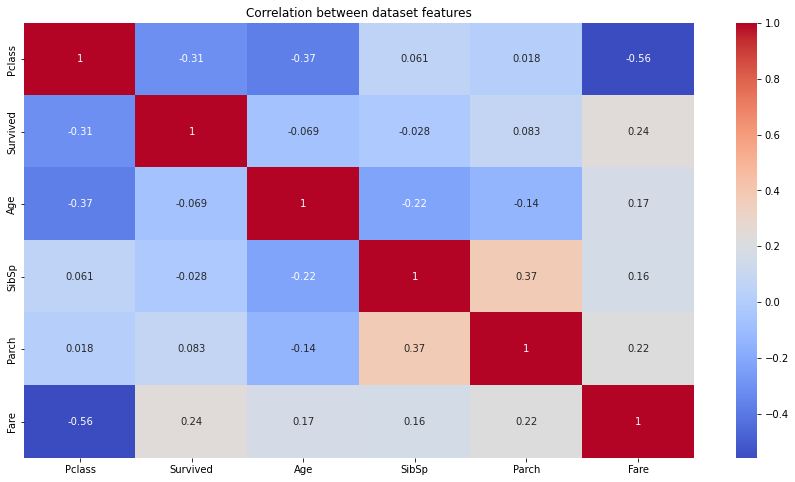

'\nThere is a positive correlation between Survived and Fare, meaning that as fare increases the chances of survivals also increase, \nthe correlation is negative between Survived and Pclass meaning lowers classes decreases survivals chances.\nThere is a negative but logical correlation between Fare and Pclass, meaning as Fare increases the class category decrease (i.e: fare increases with the first class)\nThere is positive correlation between SibSp and Parch meaning that both features increases together (having more siblings and spouses means having more parent/ children aboard)\n'

In [21]:
# Heatmap showing correlation between the different features in the dataset
# The heatmap below shows the correlation between the features but this DOESN'T MEAN A CAUSALITY !

plt.figure(figsize=(15,8))
sns.heatmap(df_all.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation between dataset features")
plt.show()

'''
There is a positive correlation between Survived and Fare, meaning that as fare increases the chances of survivals also increase, 
the correlation is negative between Survived and Pclass meaning lowers classes decreases survivals chances.
There is a negative but logical correlation between Fare and Pclass, meaning as Fare increases the class category decrease (i.e: fare increases with the first class)
There is positive correlation between SibSp and Parch meaning that both features increases together (having more siblings and spouses means having more parent/ children aboard)
'''

In [22]:
# Finally we will group the feature we are interested in, in a final dataframe
df_final = df_all.loc[:,['Survived', 'Pclass', 'Sex', 'Embarked', 'Age', 'Cabin_letter', 'Relatives',  'Fare', 'Title', 'Ticket_2']] 

# III.Classification models:


In [23]:
# We start by one-hot encoding ==> converting categorical features into binary variables 
df_dt = pd.get_dummies(df_final, columns=['Pclass', 'Sex', 'Embarked', 'Age', 'Cabin_letter', 'Relatives',  'Fare', 'Title', 'Ticket_2'])

In [24]:
# Get dependent variables and features
X = df_dt.drop(columns=['Survived'])
y = df_dt['Survived']

In [25]:
# Split the data into training and testing sets 80/20, fixing random state in order to reproduce results
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

## 1 - Decision Tree:

In [86]:
# init decision tree
dt = DecisionTreeClassifier(random_state=91)

# fit the decision tree
dt.fit(X_train, y_train)

# predict using model based on test data
y_pred = dt.predict(X_test)

# Decision tree metrics
dt_accuracy = accuracy_score(y_test, y_pred)
dt_precision = precision_score(y_test, y_pred)
dt_recall = recall_score(y_test, y_pred)
dt_f1 = f1_score(y_test, y_pred)
dt_cm = confusion_matrix(y_test, y_pred)
dt_cr = classification_report(y_test, y_pred)

print("Accuracy: {:.2f}%".format(dt_accuracy * 100))
print("Precision: {:.2f}%".format(dt_precision * 100))
print("Recall: {:.2f}%".format(dt_recall * 100))
print("F1-score : {:.2f}%".format(dt_f1 * 100))
print("\nDecision tree report: \n",dt_cr)

'''
with an accuracy (TP +TN /all) of 87.02% ---> the model makes mostly correct predictions (TP + TN) 
but still makes false predictions 13% of the time

Precision (TP/TP+FP) of 81.93 % ---> model makes mostly correct true positive predicitions
out of all positive predictions made by the model, the model can correctly identify over 80% of the truly positive values

Recall (TP/TP+FN) ---> our decision tree model can identify 78% of the actual surviving passengers and 91% of truly dead passengers. 
(i.e: 22% of those who survived were classified dead by the model and 9% of those
who died were classified as survived by the same model).

F1-score ---> is a measure of the harmonic mean of precision and recall so it takes into account both
the false positive and false negative predictions made. a F1-score of 80% (sor surviving passengers) and 90% for (for dead passengers)
means that the decision tree succesfully identified an important amount of death/survived passengers however it still not perfect at giving precise predicitions.

From the metrics in the report below, we can clearly see that overall the Decision Tree model made better predictions
for deaths that it did for the surviving passengers. which could be mainly due to the amount of 'dead' passengers data that it was trained on 
far exceeding the amount of 'surviving' data so it made the model classifies easily one over the other.
'''

Accuracy: 87.02%
Precision: 81.93%
Recall: 78.16%
F1-score : 80.00%

Decision tree report: 
               precision    recall  f1-score   support

           0       0.89      0.91      0.90       175
           1       0.82      0.78      0.80        87

    accuracy                           0.87       262
   macro avg       0.86      0.85      0.85       262
weighted avg       0.87      0.87      0.87       262



"\nwith an accuracy (TP +TN /all) of 87.02% ---> the model makes mostly correct predictions (TP + TN) \nbut still makes false predictions 13% of the time\n\nPrecision (TP/TP+FP) of 81.93 % ---> model makes mostly correct true positive predicitions\nout of all positive predictions made by the model, the model can correctly identify over 80% of the truly positive values\n\nRecall (TP/TP+FN) ---> our decision tree model can identify 78% of the actual surviving passengers and 91% of truly dead passengers. \n(i.e: 22% of those who survived were classified dead by the model and 9% of those\nwho died were classified as survived by the same model).\n\nF1-score ---> is a measure of the harmonic mean of precision and recall so it takes into account both\nthe false positive and false negative predictions made. a F1-score of 80% (sor surviving passengers) and 90% for (for dead passengers)\nmeans that the decision tree succesfully identified an important amount of death/survived passengers however 


Confusion Matrix: 
 [[160  15]
 [ 19  68]]


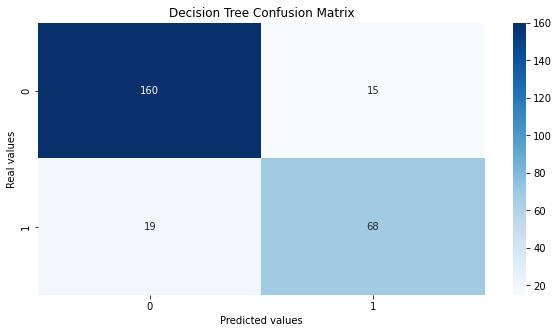

'\nConfusion matrix to visually display the metric value of (TP, TN, FP, FN)\nOut of all predicitions the TP(160) represents the biggest value followed by TN (68)\nHowever, the model still made error, predicting 15 of deaths as survived\nand prediciting 19 of survived passengers as death. \n'

In [70]:
# Confusion Matrix
print("\nConfusion Matrix: \n",dt_cm)

# Plot CM
plt.figure(figsize=(10,5))
plt.title("Decision Tree Confusion Matrix")
sns.heatmap(dt_cm, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted values')
plt.ylabel('Real values')
plt.show()

'''
Confusion matrix to visually display the metric value of (TP, TN, FP, FN)
Out of all predicitions the TP(160) represents the biggest value followed by TN (68)
However, the model still made error, predicting 15 of deaths as survived
and prediciting 19 of survived passengers as death. 
'''

In [71]:
# AUC - ROC
#predict_proba ==> the probability that a particular data point falls into each class
#get predicted proba of survived = 1 
y_pred_proba = dt.predict_proba(X_test)[:, 1] 
dt_auc = roc_auc_score(y_test, y_pred_proba)
print("AUC-ROC = {:.2f}".format(dt_auc))

'''
We have an AUC-ROC score of 0.85 ---> closer to 1 which means that the decision tree
had classified correctly most of the (death passengers) data
which is consistent with what we found above on the difference in the metrics between survived:1 and dead:0
'''

AUC-ROC = 0.85


'\nWe have an AUC-ROC score of 0.85 ---> closer to 1 which means that the decision tree\nhad classified correctly most of the (death passengers) data\nwhich is consistent with what we found above on the difference in the metrics between survived:1 and dead:0\n'

'\nThe ROC curve below indicates is far from the diagonal which indicates that our classifier does\na fairly good but not perfect job at classifiying the data.\n'

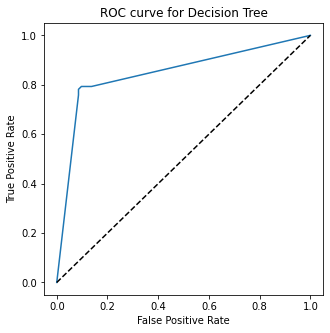

In [72]:
def plot_sklearn_roc_curve(y_real, y_pred):
    '''
    Plots the ROC Curve with the sklearn methods by using the real observations and their predictions.
    
    Args:
        y_real: The list or series with the real classes
        y_pred: The list or series with the predicted classes
    '''
    fpr, tpr, th = roc_curve(y_real, y_pred)
    roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
    roc_display.figure_.set_size_inches(5,5)
    plt.title('ROC curve for Decision Tree')
    plt.plot([0, 1], [0, 1], 'k--')


# Plots the ROC curve using the sklearn methods
plot_sklearn_roc_curve(y_test, y_pred_proba)

'''
The ROC curve below indicates is far from the diagonal which indicates that our classifier does
a fairly good but not perfect job at classifiying the data.
'''

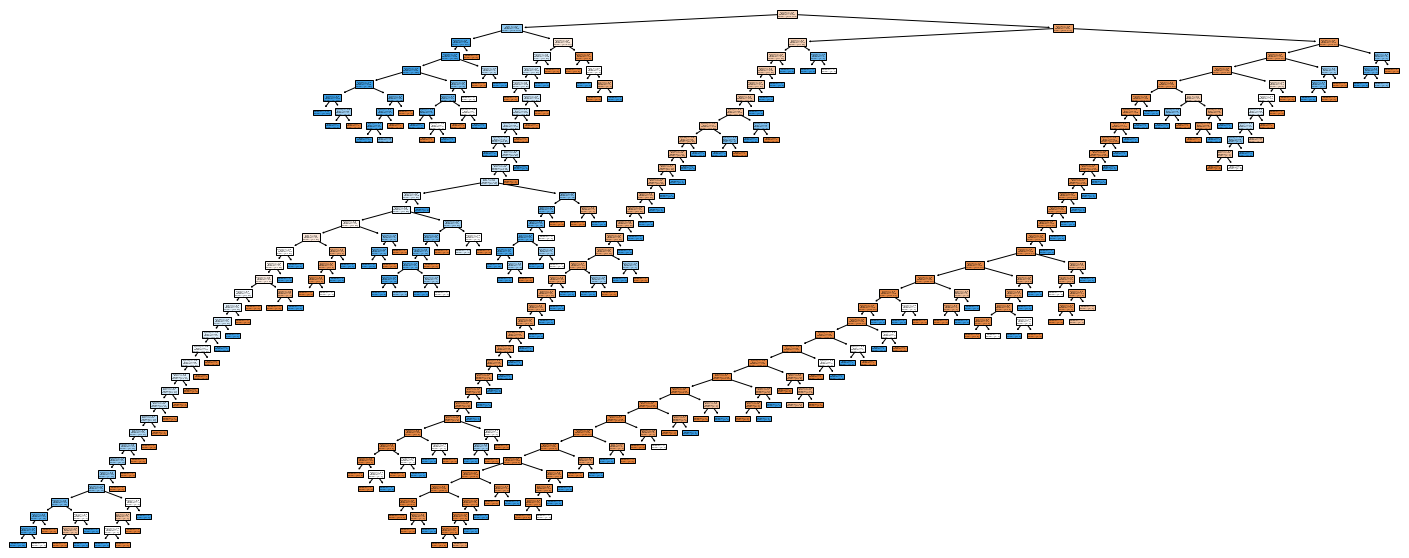

In [73]:
#Visualizing the decision tree
plt.figure(figsize=(25,10))
plot_tree(dt, filled=True)
plt.show()

## 2 - Random Forest:

In [74]:
# init RF Classifier with # of trees
rf = RandomForestClassifier(n_estimators=300, random_state = 36)

# train/fit the Random Forest
rf.fit(X_train, y_train)

#predict
y_pred_rf = rf.predict(X_test)


# Random Forest metrics
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_precision = precision_score(y_test, y_pred_rf)
rf_recall = recall_score(y_test, y_pred_rf)
rf_f1 = f1_score(y_test, y_pred_rf)
rf_cm = confusion_matrix(y_test, y_pred_rf)
rf_cr = classification_report(y_test, y_pred_rf)

print("Accuracy: {:.2f}%".format(rf_accuracy * 100))
print("Precision: {:.2f}%".format(rf_precision * 100))
print("Recall: {:.2f}%".format(rf_recall * 100))
print("F1-score : {:.2f}%".format(rf_f1 * 100))
print("\nRandom Forest report: \n",rf_cr)


'''
with an accuracy (TP +TN /all) of 86.6% ---> the model makes mostly correct predictions (TP + TN) 
but still makes false predictions 13.4% of the time

Precision (TP/TP+FP) of 84 % ---> model makes mostly correct true positive predicitions
out of all positive predictions made by the model, the model can correctly identify over 84% 'survived' and 88% of deaths.

Recall (TP/TP+FN) ---> our RF model can identify 74% of the actual survived values and 93% of deaths. It means that the model 
wrongly classifies 26% of surviving passengers as dead (i.e: 26% of those who survived were classified dead by the model and 7% of those
who died were classified as survived by the same model).

F1-score ---> is a measure of the harmonic mean of precision and recall so it takes into account both
the false positive and false negative predictions made. a F1-score of 79% (for survived) and 90% (for deaths means) that the Random forest succesfully identified 
an important amount of death/survived passengers however it still not perfect at giving precise predicitions.

From the metrics  in the report below, we can clearly see that overall the Random Forest model made better predictions
for deaths that it did for the surviving passengers. 
'''

Accuracy: 86.64%
Precision: 84.21%
Recall: 73.56%
F1-score : 78.53%

Random Forest report: 
               precision    recall  f1-score   support

           0       0.88      0.93      0.90       175
           1       0.84      0.74      0.79        87

    accuracy                           0.87       262
   macro avg       0.86      0.83      0.84       262
weighted avg       0.86      0.87      0.86       262



"\nwith an accuracy (TP +TN /all) of 86.6% ---> the model makes mostly correct predictions (TP + TN) \nbut still makes false predictions 13.4% of the time\n\nPrecision (TP/TP+FP) of 84 % ---> model makes mostly correct true positive predicitions\nout of all positive predictions made by the model, the model can correctly identify over 84% 'survived' and 88% of deaths.\n\nRecall (TP/TP+FN) ---> our RF model can identify 74% of the actual survived values and 93% of deaths. It means that the model \nwrongly classifies 26% of surviving passengers as dead (i.e: 26% of those who survived were classified dead by the model and 7% of those\nwho died were classified as survived by the same model).\n\nF1-score ---> is a measure of the harmonic mean of precision and recall so it takes into account both\nthe false positive and false negative predictions made. a F1-score of 79% (for survived) and 90% (for deaths means) that the Random forest succesfully identified \nan important amount of death/survi


Confusion Matrix: 
 [[160  15]
 [ 19  68]]


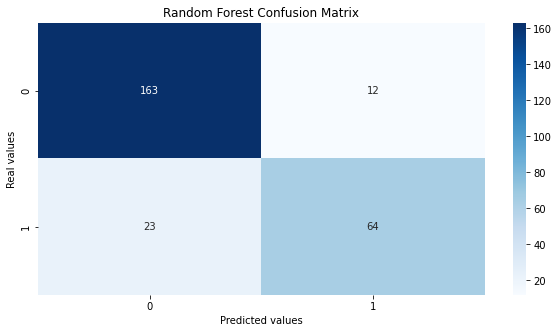

'\nConfusion matrix to visually display the metric value of (TP, TN, FP, FN)\nOut of all predicitions the TP(161: those who effectively died) represents the biggest value followed by TN (64: those who actually survived)\nHowever, the model still made error, predicting 12 of deaths as survived\nand prediciting 23 of survived passengers as death. \n'

In [75]:
# Confusion Matrix
print("\nConfusion Matrix: \n",dt_cm)

# Plot CM
plt.figure(figsize=(10,5))
plt.title("Random Forest Confusion Matrix")
sns.heatmap(rf_cm, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted values')
plt.ylabel('Real values')
plt.show()

'''
Confusion matrix to visually display the metric value of (TP, TN, FP, FN)
Out of all predicitions the TP(161: those who effectively died) represents the biggest value followed by TN (64: those who actually survived)
However, the model still made error, predicting 12 of deaths as survived
and prediciting 23 of survived passengers as death. 
'''

## 3 - Random forest w/ Bagging:

In [85]:
# We test now a Bagging Classifier with the Random Forest from above 
# Our goal is to test out if the model performance will improve by using multiple RF classifiers with different training subsets
# Init Bagging Classifier w/ Random Forest
rfb = BaggingClassifier(base_estimator=RandomForestClassifier(n_estimators=300, random_state=1), n_estimators=60, random_state=2, bootstrap=True, n_jobs=-1)

# Fit RFB classifier
rfb.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rfb = rfb.predict(X_test)


# RF bagging metrics
rfb_accuracy = accuracy_score(y_test, y_pred_rfb)
rfb_precision = precision_score(y_test, y_pred_rfb)
rfb_recall = recall_score(y_test, y_pred_rfb)
rfb_f1 = f1_score(y_test, y_pred_rfb)
rfb_cm = confusion_matrix(y_test, y_pred_rfb)
rfb_cr = classification_report(y_test, y_pred_rfb)

print("Accuracy: {:.2f}%".format(rfb_accuracy * 100))
print("Precision: {:.2f}%".format(rfb_precision * 100))
print("Recall: {:.2f}%".format(rfb_recall * 100))
print("F1-score : {:.2f}%".format(rfb_f1 * 100))
print("\nRandom Forest report: \n",rfb_cr)

'''
We can see that the best accuracy 87% was achieved with Random forest Bagging
---> meaning that the model made mostly accurate predictions

The precision of the model is also over 85% 
---> meaning that the classifier here made 85% of accurate predicitions for 'survived:1' and over 88% for 'survived:0' over all the positive predictions made by the model.

The recall is 73.56 %
---> meaning that out of all the truly positive values(TP + FN), the model made a recall of 74% for those who actually survived and 94% of those who died. 

The F1-score is 79%
---> We got a score of 79% for those who survived and 91% for deaths, meaning that the Random Forest Bagging model correctly identified a good amount 
of passengers surval state, while making more precise predictions for deaths than survivals. However, this model is still not perfectly prediciting all values.
F1-score ---> is a measure of the harmonic mean of precision and recall so it takes into account both

From our analysis and the metrics in the report below, we can clearly see that overall the Random Forest Bagging model made better predictions
for deaths that it did for the surviving passengers. 
'''

Accuracy: 87.02%
Precision: 85.33%
Recall: 73.56%
F1-score : 79.01%

Random Forest report: 
               precision    recall  f1-score   support

           0       0.88      0.94      0.91       175
           1       0.85      0.74      0.79        87

    accuracy                           0.87       262
   macro avg       0.87      0.84      0.85       262
weighted avg       0.87      0.87      0.87       262



"\nWe can see that the best accuracy 87% was achieved with Random forest Bagging\n---> meaning that the model made mostly accurate predictions\n\nThe precision of the model is also over 85% \n---> meaning that the classifier here made 85% of accurate predicitions for 'survived:1' and over 88% for 'survived:0' over all the positive predictions made by the model.\n\nThe recall is 73.56 %\n---> meaning that out of all the truly positive values(TP + FN), the model made a recall of 74% for those who actually survived and 94% of those who died. \n\nThe F1-score is 79%\n---> We got a score of 79% for those who survived and 91% for deaths, meaning that the Random Forest Bagging model correctly identified a good amount \nof passengers surval state, while making more precise predictions for deaths than survivals. However, this model is still not perfectly prediciting all values.\nF1-score ---> is a measure of the harmonic mean of precision and recall so it takes into account both\n\nFrom our ana


Confusion Matrix: 
 [[160  15]
 [ 19  68]]


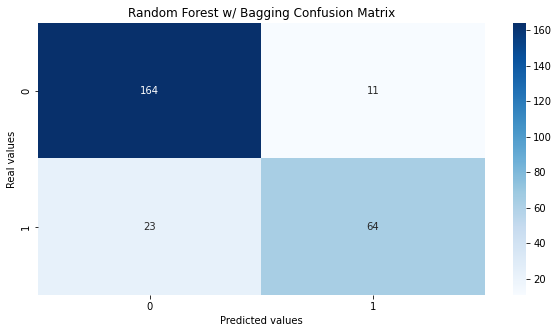

'\nConfusion matrix to visually display the metric value of (TP, TN, FP, FN)\nWe can see that the Random Forest w/ Bagging has a higher value of TP and TN compared to both models above (Decision Tree & Random Forest)\n'

In [77]:
# Confusion Matrix
print("\nConfusion Matrix: \n",dt_cm)

# Plot CM
plt.figure(figsize=(10,5))
plt.title("Random Forest w/ Bagging Confusion Matrix")
sns.heatmap(rfb_cm, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted values')
plt.ylabel('Real values')
plt.show()

'''
Confusion matrix to visually display the metric value of (TP, TN, FP, FN)
We can see that the Random Forest w/ Bagging has a higher value of TP and TN compared to both models above (Decision Tree & Random Forest)
'''

## 4 - K-Nearest Neighbor:

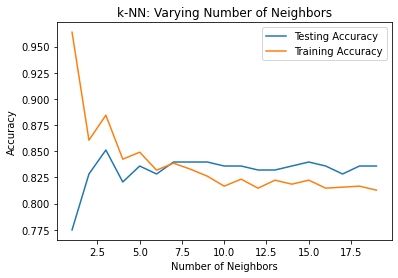

"\nkNN is a nonparametric model. It means it doesn't have parameters to penalize or drop. As the main point of regularization is preventing overfitting, we can here\nincrease the k number as it leads to averaging over many points instead of memorizing the training set as in k=1. In this specific case, testing accuracy is maximized for k=3. \n"

In [78]:
## Here we want to check how many neighbors we need to select for our model to have the best accuracy. 

neighbors = np.arange(start=1, stop=20, step=1)
train_accuracy = []
test_accuracy = []

# Loop over different values of k
for i in neighbors:
    # Setup a k-NN Classifier with i neighbors
    knn = KNeighborsClassifier(n_neighbors=i)

    # Fit the classifier to the training data
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training and testig set
    train_accuracy.append(knn.score(X_train, y_train))
    test_accuracy.append(knn.score(X_test, y_test))

# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

'''
kNN is a nonparametric model. It means it doesn't have parameters to penalize or drop. As the main point of regularization is preventing overfitting, we can here
increase the k number as it leads to averaging over many points instead of memorizing the training set as in k=1. In this specific case, testing accuracy is maximized for k=3. 
'''

In [79]:
# We therefore decide to choose n_neighbors=3 as it maximises the accuracy on our testing set. 
knn = KNeighborsClassifier(n_neighbors=3)

# Fit the classifier to the training data
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

#Compute evaluation metrics on the training and testing sets
knn_accuracy = accuracy_score(y_test, y_pred)
knn_precision = precision_score(y_test, y_pred)
knn_recall = recall_score(y_test, y_pred)
knn_f1 = f1_score(y_test, y_pred)
knn_cm = confusion_matrix(y_test, y_pred)
knn_cr = classification_report(y_test, y_pred)

print("Accuracy: {:.2f}%".format(knn_accuracy * 100))
print("Precision: {:.2f}%".format(knn_precision * 100))
print("Recall: {:.2f}%".format(knn_recall * 100))
print("F1-score : {:.2f}%".format(knn_f1 * 100))
print("\nKNN report: \n",knn_cr)

'''
With an accuracy (TP +TN /all) of 85.11% ---> the model makes mostly correct predictions (TP + TN) 
but still makes false predictions 15% of the time
Precision (TP/TP+FP) of 81.58 % ---> model makes mostly correct true positive predicitions 
Recall (TP/TP+FN) ---> our KNN model can identify 71.26% of the actual positive values. meaning that 29% of truly positive 
value are not successfully predicted
F1-score is the harmonic mean of precision and recall. In this specific case, our model is much more powerful at predicting 
death people than alive people. 
'''

Accuracy: 85.11%
Precision: 81.58%
Recall: 71.26%
F1-score : 76.07%

KNN report: 
               precision    recall  f1-score   support

           0       0.87      0.92      0.89       175
           1       0.82      0.71      0.76        87

    accuracy                           0.85       262
   macro avg       0.84      0.82      0.83       262
weighted avg       0.85      0.85      0.85       262



'\nWith an accuracy (TP +TN /all) of 85.11% ---> the model makes mostly correct predictions (TP + TN) \nbut still makes false predictions 15% of the time\nPrecision (TP/TP+FP) of 81.58 % ---> model makes mostly correct true positive predicitions \nRecall (TP/TP+FN) ---> our KNN model can identify 71.26% of the actual positive values. meaning that 29% of truly positive \nvalue are not successfully predicted\nF1-score is the harmonic mean of precision and recall. In this specific case, our model is much more powerful at predicting \ndeath people than alive people. \n'

## 5 - Logistic Regression

In [80]:
## hyperparameter optimization

# Here we want to define a search space as a grid of hyperparameter values and evaluate every position in the grid.
# Setup the hyperparameter grid
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space}

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# We say that we want to determine the C value for which our model accuracy is maximized. 
logreg_cv = GridSearchCV(logreg, param_grid, cv=5, scoring='accuracy')

logreg_cv.fit(X_train,y_train)
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_))
#print(logreg_cv.cv_results_) # -> The following will give us many measures such as the mean fit time for each cv, and the mean test core for each C and for each split. 

Tuned Logistic Regression Parameters: {'C': 3.727593720314938}


In [81]:
logreg = LogisticRegression(penalty='l2', C=list(logreg_cv.best_params_.values())[0])
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

#Compute evaluation metrics on the training and testing sets
lg_accuracy = accuracy_score(y_test, y_pred)
lg_precision = precision_score(y_test, y_pred)
lg_recall = recall_score(y_test, y_pred)
lg_f1 = f1_score(y_test, y_pred)
lg_cm = confusion_matrix(y_test, y_pred)
lg_cr = classification_report(y_test, y_pred)

print("Accuracy: {:.2f}%".format(lg_accuracy * 100))
print("Precision: {:.2f}%".format(lg_precision * 100))
print("Recall: {:.2f}%".format(lg_recall * 100))
print("F1-score : {:.2f}%".format(lg_f1 * 100))
print("\nLG report: \n",lg_cr)

'''
With an accuracy (TP +TN /all) of 83.21% ---> the model makes mostly correct predictions (TP + TN) 
but still makes false predictions 17% of the time
Precision (TP/TP+FP) of 74.16 % ---> model makes mostly correct true positive predicitions but it's definitely not a high score.  
Recall (TP/TP+FN) ---> our logreg model can identify 75.86% of the actual positive values. meaning that 24% of truly positive 
value are not successfully predicted.
F1-score is the harmonic mean of precision and recall. In this specific case, our model is much more powerful at predicting 
death people than alive people.  
'''

Accuracy: 83.21%
Precision: 74.16%
Recall: 75.86%
F1-score : 75.00%

LG report: 
               precision    recall  f1-score   support

           0       0.88      0.87      0.87       175
           1       0.74      0.76      0.75        87

    accuracy                           0.83       262
   macro avg       0.81      0.81      0.81       262
weighted avg       0.83      0.83      0.83       262



"\nWith an accuracy (TP +TN /all) of 83.21% ---> the model makes mostly correct predictions (TP + TN) \nbut still makes false predictions 17% of the time\nPrecision (TP/TP+FP) of 74.16 % ---> model makes mostly correct true positive predicitions but it's definitely not a high score.  \nRecall (TP/TP+FN) ---> our logreg model can identify 75.86% of the actual positive values. meaning that 24% of truly positive \nvalue are not successfully predicted.\nF1-score is the harmonic mean of precision and recall. In this specific case, our model is much more powerful at predicting \ndeath people than alive people.  \n"

# IV.Conclusion:

In [88]:
# Models Summary
metrics_df = pd.DataFrame({
    'Model': ['Decision Tree', 'Random Forest', 'RF w/ Bagging', 'KNN', 'Logistic Regression'],
    'Accuracy': [dt_accuracy, rf_accuracy, rfb_accuracy, knn_accuracy, lg_accuracy],
    'Precision': [dt_precision, rf_precision, rfb_precision, knn_precision, lg_precision],
    'Recall': [dt_recall, rf_recall, rfb_recall, knn_recall, lg_recall],
    'F1-score': [dt_f1, rf_f1, rfb_f1, knn_f1, lg_f1]
    })

metrics_df

,Model,Accuracy,Precision,Recall,F1-score
0,Decision Tree,0.870229,0.819277,0.781609,0.800000
1,Random Forest,0.866412,0.842105,0.735632,0.785276
2,RF w/ Bagging,0.870229,0.853333,0.735632,0.790123
3,KNN,0.851145,0.815789,0.712644,0.760736
4,Logistic Regression,0.832061,0.741573,0.758621,0.750000


**CONCLUSION:**

From the models summary above, we can see that taking into account all metrics, we have interesting results here.
Indeed, our Decision Tree has the exact same accuracy than our Random Forest w/ Bagging (which is quite uncommon!). 
To determine which model is truly the best, we can 1) select the model which run faster than the other or 2) look at other metrics.
As the selected model won't be deployed, the running time is not really important. **We can therefore look at the F1-score**. 
Looking at the recall would be necessary if we were working on some use cases for the health/counter terrorism sectors, but this is not the case.  
We therefore decide that our **Decision Tree** is our best model as it has the best F-1 score compared to the RF w/ Bagging.
Despite its great precision, the RF w/ Bagging model has quite a low recall, therefore affecting the F-1 score (which is the harmonic mean 
between the precision and the recall).
